#### Importing Libraries and Data

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import scipy.stats as stats

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
os.chdir('D:/deepanshu/codes/data_sets/diabetes')

In [9]:
xdata = pd.read_csv('Diabetes_XTrain.csv')

In [10]:
xdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [11]:
ydata = pd.read_csv('Diabetes_YTrain.csv')

In [12]:
ydata.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [13]:
data = xdata.join(ydata)

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


#### Finding nan values and a quick overview of data

In [15]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
 8   Outcome                   576 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 40.6 KB


In [17]:
np.unique(data.Pregnancies)
#descrete

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 17],
      dtype=int64)

In [18]:
np.unique(data.BloodPressure)
#descrete

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,  78,
        80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98, 100,
       102, 104, 106, 108, 110, 114, 122], dtype=int64)

In [19]:
np.unique(data.Glucose)
#cont

array([  0,  44,  56,  57,  61,  65,  67,  68,  71,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 154, 155, 156,
       157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199],
      dtype=int64)

In [20]:
np.unique(data.SkinThickness)
#descrete

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 56, 60, 63],
      dtype=int64)

In [21]:
np.unique(data.Insulin)
#cont

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  36,  37,  38,  40,
        41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  68,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  99, 100,
       105, 106, 108, 110, 112, 114, 115, 116, 120, 122, 125, 126, 128,
       129, 130, 132, 135, 140, 145, 148, 150, 152, 155, 156, 158, 159,
       160, 165, 166, 167, 168, 170, 175, 176, 180, 182, 184, 185, 188,
       190, 191, 192, 193, 194, 196, 200, 204, 205, 207, 210, 215, 220,
       225, 230, 231, 235, 237, 240, 245, 250, 265, 270, 271, 275, 277,
       278, 280, 284, 285, 293, 300, 304, 318, 321, 325, 326, 330, 342,
       360, 370, 375, 387, 392, 402, 415, 440, 465, 474, 478, 510, 540,
       543, 545, 579, 600, 744], dtype=int64)

In [22]:
np.unique(data.BMI)
#cont

array([ 0. , 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20. , 20.1,
       20.4, 20.8, 21. , 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.9, 23. , 23.1, 23.2, 23.3, 23.5, 23.6, 23.7,
       23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.6, 24.7, 24.8, 24.9,
       25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8, 25.9, 26. , 26.1,
       26.2, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3,
       27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.2, 28.3, 28.4, 28.5,
       28.6, 28.7, 28.8, 28.9, 29. , 29.2, 29.3, 29.5, 29.6, 29.7, 29.8,
       29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.6, 31.9, 32. , 32.2, 32.3, 32.4, 32.5, 32.7, 32.8,
       32.9, 33.1, 33.2, 33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1,
       34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2,
       35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36.3,
       36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37. , 37

In [23]:
np.unique(data.DiabetesPedigreeFunction)
#cont

array([0.078, 0.084, 0.085, 0.088, 0.089, 0.096, 0.102, 0.108, 0.121,
       0.122, 0.126, 0.127, 0.128, 0.129, 0.134, 0.137, 0.138, 0.14 ,
       0.141, 0.142, 0.143, 0.144, 0.145, 0.147, 0.148, 0.149, 0.15 ,
       0.151, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 ,
       0.161, 0.162, 0.163, 0.164, 0.165, 0.167, 0.171, 0.175, 0.177,
       0.178, 0.179, 0.18 , 0.181, 0.182, 0.183, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.194, 0.196, 0.197, 0.198, 0.199, 0.203,
       0.204, 0.205, 0.206, 0.207, 0.209, 0.21 , 0.212, 0.217, 0.218,
       0.219, 0.22 , 0.221, 0.222, 0.223, 0.225, 0.229, 0.23 , 0.231,
       0.232, 0.233, 0.234, 0.235, 0.236, 0.237, 0.238, 0.239, 0.24 ,
       0.241, 0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249, 0.251,
       0.252, 0.253, 0.254, 0.256, 0.257, 0.258, 0.259, 0.26 , 0.261,
       0.262, 0.263, 0.264, 0.265, 0.267, 0.268, 0.269, 0.27 , 0.271,
       0.277, 0.278, 0.279, 0.28 , 0.282, 0.283, 0.284, 0.285, 0.286,
       0.287, 0.289,

In [24]:
np.unique(data.Age)
#descrete

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81], dtype=int64)

In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861,0.348958
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137,0.477055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000,1.000000


### Dropping any Duplicates data points

In [26]:
data.drop_duplicates(keep='first',inplace = True)

### Visualising Outliers

<AxesSubplot:ylabel='Pregnancies'>

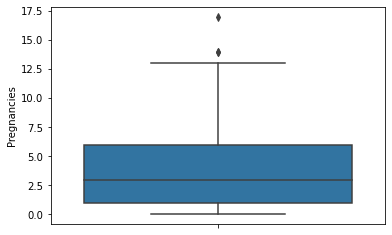

In [27]:
sns.boxplot(y=data.Pregnancies)

In [28]:
np.where(data.Pregnancies >= 6)

(array([  0,   1,   2,   5,  11,  13,  15,  16,  29,  37,  40,  42,  44,
         47,  52,  54,  57,  61,  64,  65,  74,  78,  79,  90,  91,  96,
         97, 100, 106, 110, 112, 118, 123, 125, 126, 137, 142, 145, 146,
        147, 148, 149, 152, 154, 157, 160, 162, 165, 169, 171, 184, 186,
        189, 190, 195, 197, 202, 203, 219, 224, 228, 229, 232, 243, 244,
        247, 253, 254, 261, 267, 277, 280, 285, 291, 307, 313, 314, 317,
        319, 321, 322, 323, 327, 334, 337, 340, 347, 348, 350, 353, 355,
        359, 360, 363, 365, 370, 372, 379, 393, 394, 397, 400, 402, 404,
        406, 407, 411, 413, 414, 420, 421, 428, 429, 431, 432, 434, 438,
        444, 445, 448, 451, 453, 458, 465, 466, 467, 473, 477, 479, 480,
        483, 484, 485, 486, 493, 497, 498, 499, 500, 506, 508, 512, 520,
        522, 525, 527, 534, 545, 548, 554, 558, 560, 566, 567, 570, 572],
       dtype=int64),)

<AxesSubplot:ylabel='Glucose'>

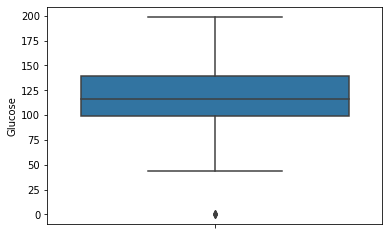

In [29]:
sns.boxplot(y=data.Glucose)

<AxesSubplot:ylabel='BloodPressure'>

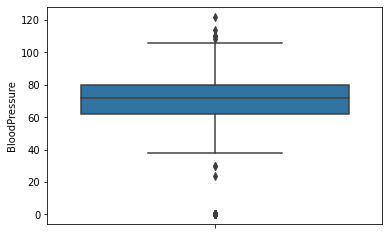

In [30]:
sns.boxplot(y=data.BloodPressure)

<AxesSubplot:ylabel='SkinThickness'>

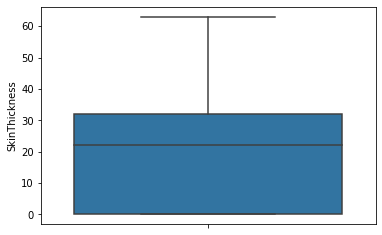

In [31]:
sns.boxplot(y=data.SkinThickness)

<AxesSubplot:ylabel='Insulin'>

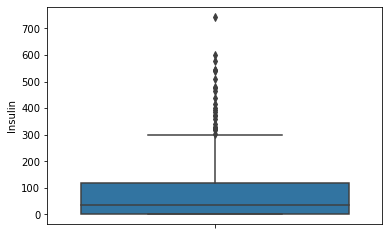

In [32]:
sns.boxplot(y=data.Insulin)

<AxesSubplot:ylabel='BMI'>

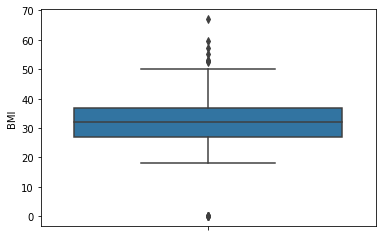

In [33]:
sns.boxplot(y=data.BMI)

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

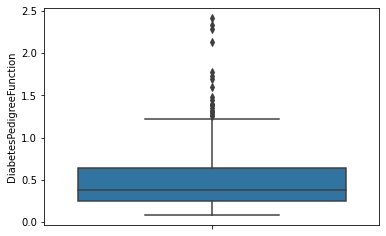

In [34]:
sns.boxplot(y=data.DiabetesPedigreeFunction)

<AxesSubplot:xlabel='Age', ylabel='Count'>

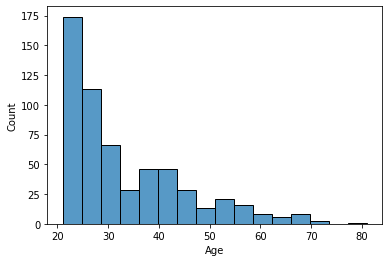

In [35]:
sns.histplot(x=data.Age)

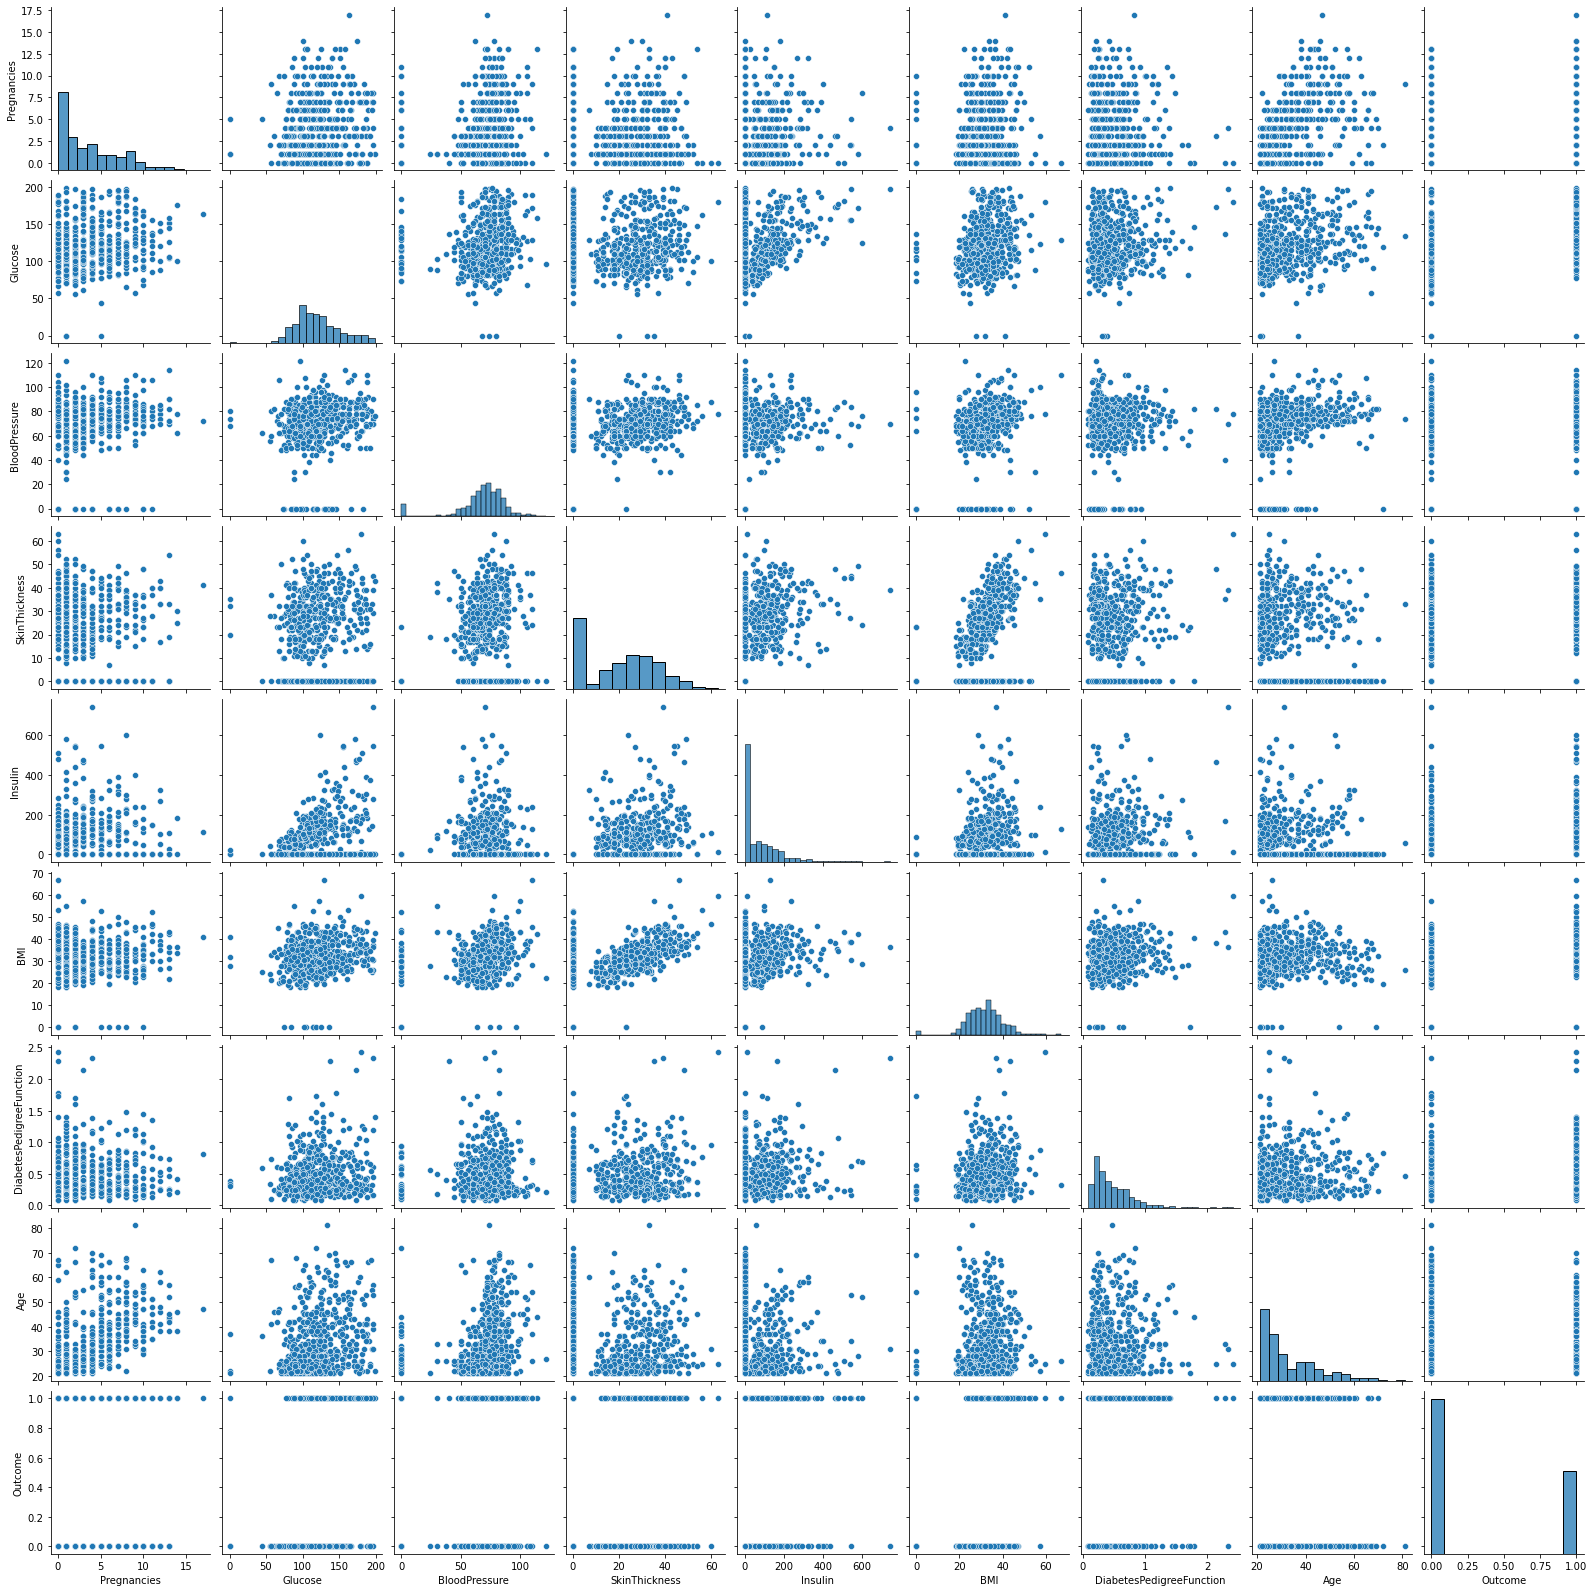

In [36]:
sns.pairplot(data)

### Finding outliers and managing it

In [37]:
def outliers(data,z_thresold=3):
    outliers = []
    count = 0
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z = (i - mean)/std
        if abs(z) > 3:
            outliers.append(i)
            count+=1
    print(count)
    return outliers    

##### Outlier for Age

In [38]:
outliers(data.Age)

4


[72, 70, 81, 69]

In [39]:
data = data[data['Age']<69]

In [40]:
data.Age.describe()

count    572.000000
mean      32.674825
std       11.428412
min       21.000000
25%       24.000000
50%       28.000000
75%       40.000000
max       68.000000
Name: Age, dtype: float64

##### Outlier for BloodPressure

In [41]:
outliers(data.BloodPressure)

28


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [42]:
print(data.BloodPressure.median())
data.BloodPressure.mean()

72.0


68.89160839160839

In [43]:
data[data['BloodPressure']==0] = data.BloodPressure.median()

C:\Users\DARIN\AppData\Local\Temp/ipykernel_6812/2997691716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['BloodPressure']==0] = data.BloodPressure.median()
C:\Users\DARIN\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [44]:
data.BloodPressure.describe()

count    572.000000
mean      72.416084
std       12.678358
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

##### Outlier for BMI

In [45]:
outliers(data.BMI)

31


[72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 0.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 0.0,
 72.0,
 72.0,
 0.0,
 72.0,
 72.0,
 72.0,
 72.0]

In [46]:
data[data['BMI']==0] = data.BloodPressure.median()

C:\Users\DARIN\AppData\Local\Temp/ipykernel_6812/1534412863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['BMI']==0] = data.BloodPressure.median()


In [47]:
data = data[data['BMI']<72]

In [48]:
data.BMI.describe()

count    541.000000
mean      32.422921
std        7.115788
min       18.200000
25%       27.300000
50%       32.200000
75%       36.800000
max       67.100000
Name: BMI, dtype: float64

##### Outliers for Insulin

In [49]:
outliers(data.Insulin)

12


[415, 465, 579, 543, 540, 440, 600, 510, 744, 474, 478, 545]

In [50]:
data = data[data['Insulin']<293]

In [51]:
data.Insulin.describe()

count    513.000000
mean      62.284600
std       75.260439
min        0.000000
25%        0.000000
50%       37.000000
75%      112.000000
max      285.000000
Name: Insulin, dtype: float64

##### Outliers for SkinThickness

In [52]:
outliers(data.SkinThickness)

0


[]

##### Outliers for Pregnancies

In [53]:
outliers(data.Pregnancies)

3


[17, 14, 14]

In [54]:
data = data[data['Pregnancies']<14]

In [55]:
data.Pregnancies.describe()

count    510.000000
mean       3.668627
std        3.230198
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: Pregnancies, dtype: float64

##### Outliers for Glucose

In [56]:
outliers(data.Glucose)

3


[0, 0, 0]

In [57]:
data[data['Glucose']==0] = data.Glucose.median() 

In [58]:
data.Glucose.describe()

count    510.000000
mean     118.351961
std       29.405223
min       44.000000
25%       99.000000
50%      112.750000
75%      134.000000
max      199.000000
Name: Glucose, dtype: float64

##### Outliers for Diabetes Pedigree 

In [59]:
outliers(data.DiabetesPedigreeFunction)

3


[112.5, 112.5, 112.5]

In [60]:
data = data[data['DiabetesPedigreeFunction']<112.5]

In [61]:
data.DiabetesPedigreeFunction.describe()

count    507.000000
mean       0.476306
std        0.322755
min        0.078000
25%        0.248500
50%        0.381000
75%        0.634000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

#### Quickview of data after cleaning

In [62]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,507.000000,507.000000,507.000000,507.000000,507.00000,507.000000,507.000000,507.000000,507.000000
mean,3.676529,118.386588,72.384615,20.700197,62.38856,32.265483,0.476306,32.745562,0.325444
std,3.234862,29.488801,13.120150,15.636081,75.30387,7.171072,0.322755,11.558083,0.469003
min,0.000000,44.000000,24.000000,0.000000,0.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.00000,27.050000,0.248500,24.000000,0.000000
50%,3.000000,113.000000,72.000000,22.000000,37.00000,32.000000,0.381000,28.000000,0.000000
75%,6.000000,134.000000,80.000000,32.000000,111.00000,36.700000,0.634000,40.000000,1.000000
max,13.000000,199.000000,122.000000,63.000000,285.00000,67.100000,2.420000,68.000000,1.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 1 to 575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               507 non-null    float64
 1   Glucose                   507 non-null    float64
 2   BloodPressure             507 non-null    float64
 3   SkinThickness             507 non-null    float64
 4   Insulin                   507 non-null    float64
 5   BMI                       507 non-null    float64
 6   DiabetesPedigreeFunction  507 non-null    float64
 7   Age                       507 non-null    float64
 8   Outcome                   507 non-null    float64
dtypes: float64(9)
memory usage: 39.6 KB


In [64]:
data.Outcome = data.Outcome.astype('int')
data.Pregnancies = data.Pregnancies.astype('int')

In [65]:
data = data.reset_index()
data

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,8,110.0,76.0,0.0,0.0,27.8,0.237,58.0,0
1,2,7,147.0,76.0,0.0,0.0,39.4,0.257,43.0,1
2,3,2,100.0,66.0,20.0,90.0,32.9,0.867,28.0,1
3,4,4,129.0,86.0,20.0,270.0,35.1,0.231,23.0,0
4,6,4,110.0,66.0,0.0,0.0,31.9,0.471,29.0,0
...,...,...,...,...,...,...,...,...,...,...
502,570,7,179.0,95.0,31.0,0.0,34.2,0.164,60.0,0
503,571,2,111.0,60.0,0.0,0.0,26.2,0.343,23.0,0
504,573,2,122.0,60.0,18.0,106.0,29.8,0.717,22.0,0
505,574,4,154.0,72.0,29.0,126.0,31.3,0.338,37.0,0


In [66]:
data = data.drop(['index'],axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,110.0,76.0,0.0,0.0,27.8,0.237,58.0,0
1,7,147.0,76.0,0.0,0.0,39.4,0.257,43.0,1
2,2,100.0,66.0,20.0,90.0,32.9,0.867,28.0,1
3,4,129.0,86.0,20.0,270.0,35.1,0.231,23.0,0
4,4,110.0,66.0,0.0,0.0,31.9,0.471,29.0,0
...,...,...,...,...,...,...,...,...,...
502,7,179.0,95.0,31.0,0.0,34.2,0.164,60.0,0
503,2,111.0,60.0,0.0,0.0,26.2,0.343,23.0,0
504,2,122.0,60.0,18.0,106.0,29.8,0.717,22.0,0
505,4,154.0,72.0,29.0,126.0,31.3,0.338,37.0,0


#### Correlation of features

In [67]:
data.corr('pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.191624,0.266073,-0.126678,-0.123935,0.047780,-0.018079,0.571353,0.207602
Glucose,0.191624,1.000000,0.258730,-0.025559,0.187946,0.212588,0.114595,0.282056,0.482301
BloodPressure,0.266073,0.258730,1.000000,0.020504,-0.052747,0.289421,-0.009900,0.359194,0.184846
SkinThickness,-0.126678,-0.025559,0.020504,1.000000,0.472095,0.400514,0.157972,-0.152852,0.052138
Insulin,-0.123935,0.187946,-0.052747,0.472095,1.000000,0.168564,0.197732,-0.106685,0.100549
BMI,0.047780,0.212588,0.289421,0.400514,0.168564,1.000000,0.168295,0.068321,0.323712
DiabetesPedigreeFunction,-0.018079,0.114595,-0.009900,0.157972,0.197732,0.168295,1.000000,0.049374,0.213990
Age,0.571353,0.282056,0.359194,-0.152852,-0.106685,0.068321,0.049374,1.000000,0.217645
Outcome,0.207602,0.482301,0.184846,0.052138,0.100549,0.323712,0.213990,0.217645,1.000000


#### Feature Selection

In [68]:
features = list(set(data.columns)-set(['Outcome']))

In [69]:
features

['Age',
 'Pregnancies',
 'BMI',
 'Insulin',
 'BloodPressure',
 'Glucose',
 'SkinThickness',
 'DiabetesPedigreeFunction']

In [129]:
x = data[features].values
print(x)

[[ 58.      8.     27.8   ... 110.      0.      0.237]
 [ 43.      7.     39.4   ... 147.      0.      0.257]
 [ 28.      2.     32.9   ... 100.     20.      0.867]
 ...
 [ 22.      2.     29.8   ... 122.     18.      0.717]
 [ 37.      4.     31.3   ... 154.     29.      0.338]
 [ 29.      1.     32.    ...  88.     29.      0.365]]


#### Output Values Selection

In [71]:
y = data['Outcome'].values
y

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Splitting test and train data

##### from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3)

In [73]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 8)
(153, 8)
(354,)
(153,)


#### Logestic Regression 

##### from sklearn.linear_model import LogisticRegression

In [74]:
logestic = LogisticRegression(max_iter=2000)

In [75]:
logestic.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

##### prediction and accuracy check

In [76]:
prediction = logestic.predict(x_test)

In [77]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.7908496732026143

In [126]:
prediction

<function __main__.prediction()>

In [128]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

#### KNN algorithm

In [80]:
 from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)

In [108]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [109]:
knn_prediction = knn_classifier.predict(x_test)

In [124]:
x_test

array([[2.70e+01, 2.00e+00, 3.96e+01, ..., 8.50e+01, 0.00e+00, 9.30e-01],
       [2.20e+01, 0.00e+00, 3.78e+01, ..., 1.79e+02, 3.60e+01, 4.55e-01],
       [6.20e+01, 1.20e+01, 2.65e+01, ..., 1.21e+02, 1.70e+01, 2.59e-01],
       ...,
       [3.00e+01, 3.00e+00, 1.93e+01, ..., 9.90e+01, 1.10e+01, 2.84e-01],
       [2.30e+01, 1.00e+00, 3.01e+01, ..., 1.11e+02, 1.90e+01, 1.43e-01],
       [3.50e+01, 5.00e+00, 3.58e+01, ..., 7.70e+01, 4.10e+01, 1.56e-01]])

In [110]:
knn_accuracy = accuracy_score(y_test,knn_prediction)
knn_accuracy

0.7777777777777778

In [111]:
cnf = confusion_matrix(y_test,knn_prediction)
print(cnf)

[[95 10]
 [24 24]]


In [86]:
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn_prediction_i = knn.predict(x_test)
    misclassified_sample = (y_test != knn_prediction_i).sum()
    print("k_value "+str(i)+' : '+str(misclassified_sample))

k_value 1 : 47
k_value 2 : 39
k_value 3 : 43
k_value 4 : 34
k_value 5 : 42
k_value 6 : 38
k_value 7 : 42
k_value 8 : 36
k_value 9 : 40
k_value 10 : 43
k_value 11 : 46
k_value 12 : 40
k_value 13 : 43
k_value 14 : 38
k_value 15 : 42
k_value 16 : 43
k_value 17 : 43
k_value 18 : 41
k_value 19 : 40


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               507 non-null    int32  
 1   Glucose                   507 non-null    float64
 2   BloodPressure             507 non-null    float64
 3   SkinThickness             507 non-null    float64
 4   Insulin                   507 non-null    float64
 5   BMI                       507 non-null    float64
 6   DiabetesPedigreeFunction  507 non-null    float64
 7   Age                       507 non-null    float64
 8   Outcome                   507 non-null    int32  
dtypes: float64(7), int32(2)
memory usage: 31.8 KB


In [131]:
def prediction():
    l = [[]]
    prenancies = int(input('Enter number of prenancies :'))
    l[0].append(prenancies)
    Glucose = int(input('Enter amount of glucose :'))
    l[0].append(Glucose)
    BP = int(input('Enter Blood Pressure :'))
    l[0].append(BP)
    skin = int(input('Enter Skin Thickness :'))
    l[0].append(skin)
    Insulin = int(input('Enter Insulin Level :'))
    l[0].append(Insulin)
    BMI = int(input('Enter BMI :'))
    l[0].append(BMI)
    pedigree = float(input('Enter Diabetes Pedigree Function :'))
    l[0].append(pedigree)
    age = int(input('Enter Age :'))
    l[0].append(age)
    #print(l.shape)
    prediction = logestic.predict(l)
    print(prediction)
    if prediction == 1:
        return print('Chance of Diabetes')
    else:
        return print('No/less Chance of Diabetes')

In [132]:
prediction()

Enter number of prenancies :3
Enter amount of glucose :140
Enter Blood Pressure :90
Enter Skin Thickness :30
Enter Insulin Level :90
Enter BMI :20
Enter Diabetes Pedigree Function :0
Enter Age :27
[1]
Chance of Diabetes


In [94]:
import joblib

In [95]:
lr_model = joblib.dump(logestic,'lr_model.pkl')

In [115]:
knn_model =joblib.dump(knn_classifier,'knn_model.pkl')

In [116]:
lr_model

['lr_model.pkl']

In [117]:
knn_model

['knn_model.pkl']

In [119]:
model = joblib.load('knn_model.pkl')

In [133]:
model

KNeighborsClassifier(n_neighbors=4)